<a href="https://colab.research.google.com/github/kassiossouza/cursosDataScience/blob/master/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 01**

**Criando os nomes**

In [221]:
import pandas as pd

In [222]:
nomesM = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [223]:
nomesM

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [224]:
nomesF = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [225]:
nomesF

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [226]:
print("A quantidade de nomes: " + str(len(nomesF) + len(nomesM)))

A quantidade de nomes: 400


In [227]:
frames = [nomesF, nomesM]

In [228]:
pd.concat(frames)['nome'].to_frame()

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [229]:
nomes = pd.concat(frames)['nome'].to_frame()

In [230]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [231]:
nomes.sample(8)

,nome
85,FABRICIO
107,ELISANGELA
116,MARCELA
115,TALITA
59,MANUEL
151,SEVERINA
76,TATIANE
162,ESTER


In [232]:
nomes.sample(8)

,nome
67,PAULA
186,ERIC
80,TAIS
183,MARLON
7,FERNANDA
114,ARTHUR
31,JOSEFA
53,RONALDO


**Importando ID dos alunos**

In [233]:
import numpy as np

In [234]:
np.random.seed(123)

In [235]:
totalAlunos = len(nomes)

In [236]:
totalAlunos

400

In [237]:
nomes['id_aluno'] = np.random.permutation(totalAlunos) + 1

In [238]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [239]:
dominiosEmail = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominiosEmail, totalAlunos)

In [240]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominioemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominioemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominioemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominioemail.com.br
198,ALVARO,383,@dominioemail.com.br


In [241]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominioemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br


In [242]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower

In [243]:
nomes.sample(3)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...
57,DAIANE,303,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...
85,HELENA,221,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...


# **Aula 02 Criando Cursos Lendo HTML**

**Criando a tabela Cursos**

In [244]:
!pip3 install html5lib
!pip3 install lxml

In [245]:
import html5lib

In [246]:
urlCursos = 'http://tabela-cursos.herokuapp.com/index.html'
pd.read_html(urlCursos)

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [247]:
urlCursos

'http://tabela-cursos.herokuapp.com/index.html'

In [248]:
type(urlCursos)

str

In [249]:
cursos = pd.read_html(urlCursos)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [250]:
type(cursos)

list

In [251]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [252]:
cursos = cursos[0]

In [253]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [254]:
type(cursos)

pandas.core.frame.DataFrame

In [255]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


**Alterando o index de cursos**

In [256]:
cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [257]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})

In [258]:
cursos.head(10)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [259]:
cursos['id'] = cursos.index + 1

In [260]:
cursos.head(10)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [261]:
cursos = cursos.set_index('id')

In [262]:
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# **Aula 03 Escrevendo CSV, JSON e HTML**

In [263]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...
172,REBECA,165,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...
130,JUNIOR,184,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...
70,JOAQUIM,248,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...
171,VALDEMIR,3,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...


**Matriculando os alunos nos cursos**

In [264]:
nomes['matriculas'] = np.random.exponential(size = totalAlunos).astype(int)

In [265]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,0
44,RAIMUNDA,259,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,0
50,RAFAELA,27,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,0
45,ADRIANO,196,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,0
117,PAMELA,189,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,0


In [266]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = totalAlunos)).astype(int)

In [267]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
10,SANDRA,174,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,2
89,JEAN,89,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1
17,LUCIANA,163,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,2
108,VILMA,31,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,2
164,MARISA,105,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1


In [268]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = totalAlunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
94,JAIR,344,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,2
197,MICHAEL,323,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1
134,ALBERTO,245,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,3
88,GILMAR,142,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,2
189,DALVA,137,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1


In [269]:
nomes.matriculas.describe()

count    400.000000
mean       2.100000
std        1.464706
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: matriculas, dtype: float64

In [270]:
import seaborn as sns

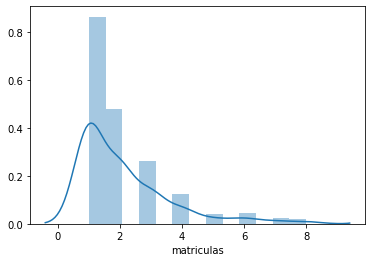

In [271]:
sns.distplot(nomes.matriculas)

In [272]:
nomes.matriculas.value_counts()

1    186
2    103
3     56
4     27
6     10
5      9
7      5
8      4
Name: matriculas, dtype: int64

**Selecionando os cursos**

In [273]:
nomes.sample(8)

,nome,id_aluno,dominio,email,matriculas
186,INES,319,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
65,MAURICIO,395,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
161,RAIANE,247,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
64,VIVIANE,396,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,5
22,VITORIA,80,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
141,NEIDE,325,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,2
45,ANDREIA,37,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,3
24,CLAUDIA,16,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,6


In [274]:
nomes.head(10)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1
1,ANA,43,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,2
2,FRANCISCA,304,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,7
3,ANTONIA,156,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,6
4,ADRIANA,343,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,2
5,JULIANA,310,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
6,MARCIA,55,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1
7,FERNANDA,288,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,2
8,PATRICIA,379,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
9,ALINE,92,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1


In [275]:
listaTotalMatriculas = []
x = np.random.rand(20)
prop = (x / sum(x))

In [276]:
 for index, row in nomes.iterrows():
   id = row.id_aluno
   matriculas = row.matriculas
   for i in range(matriculas):
     mat = [id, np.random.choice(cursos.index, p = prop)]
     listaTotalMatriculas.append(mat)

matriculas = pd.DataFrame(listaTotalMatriculas, columns = ['id_aluno', 'id_curso'])

In [277]:
matriculas.head(10)

,id_aluno,id_curso
0,235,17
1,43,2
2,43,9
3,304,6
4,304,11
5,304,6
6,304,19
7,304,1
8,304,18
9,304,9


In [278]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,47,Lógica de programação
2,10,Java para Web
3,26,C# para Web
4,59,Ruby on Rails
5,34,Cursos de Python
6,74,PHP com MySql
7,68,.NET para web
8,15,Novas integrações com Java
9,60,TDD com Java


In [279]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
126,SEBASTIANA,30,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,3
13,DANIEL,195,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
78,SILVIA,115,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,2
121,LIVIA,106,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1
60,SARA,32,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1


In [280]:
cursos.sample(5)

,nome_do_curso
id,
13,Persistência com .NET
8,Novas integrações com Java
6,PHP com MySql
5,Cursos de Python
14,Desenvolvendo jogos


In [281]:
matriculas.sample(5)

,id_aluno,id_curso
278,274,11
662,320,10
570,373,17
638,28,12
702,245,20


In [282]:
matriculaPorCurso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

In [283]:
matriculaPorCurso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,47,Lógica de programação
2,10,Java para Web
3,26,C# para Web
4,59,Ruby on Rails
5,34,Cursos de Python
6,74,PHP com MySql
7,68,.NET para web
8,15,Novas integrações com Java
9,60,TDD com Java


**Saída em diferentes formatos**

In [284]:
matriculaPorCurso.head(5)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,47,Lógica de programação
2,10,Java para Web
3,26,C# para Web
4,59,Ruby on Rails
5,34,Cursos de Python


In [285]:
matriculaPorCurso.to_csv('matriculas_por_curso', index = False)

In [289]:
pd.read_csv('matriculas_por_curso.csv')

FileNotFoundError: ignored

In [ ]:
matriculasJson = matriculaPorCurso.to_json()

In [ ]:
matriculasJson

In [316]:
matriculasHtml = matriculaPorCurso.to_html()

In [317]:
matriculasHtml

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>47</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>10</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>26</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>59</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>34</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>74</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>68</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>15</td>\n      <td>Novas integrações com Java</td>\n

In [318]:
print(matriculasHtml)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>47</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>10</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>26</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>59</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>34</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>74</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>68</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>15</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>60</td>


# **Aula 04 Lendo e escrevendo SQL**

**Criando o banco SQL**

In [ ]:
!pip install sqlalchemy #Importa a biblioteca necessária para utilizar um BD no projeto

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

In [ ]:
type(engine)

In [ ]:
matriculaPorCurso.head(8)

In [ ]:
matriculaPorCurso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names)

In [ ]:
print(engine.table_names())

**Buscando do banco SQL**

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

In [ ]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
cursosMaisMatriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
cursosMaisMatriculas

In [ ]:
cursosMaisMatriculas.query('quantidade_de_alunos > 70')

In [ ]:
cursosMaisMatriculas = cursosMaisMatriculas.query('quantidade_de_alunos > 70')

In [ ]:
cursosMaisMatriculas

**Escrevendo no banco**

In [ ]:
cursosMaisMatriculas.to_sql('muitas_matriculas', con = engine)

In [287]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# **Aula 05 Lendo e Escrevendo Excel**

**Nomes dos alunos e alunas da próxima turma**

In [290]:
matriculaPorCurso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,47,Lógica de programação
2,10,Java para Web
3,26,C# para Web
4,59,Ruby on Rails
5,34,Cursos de Python
6,74,PHP com MySql
7,68,.NET para web
8,15,Novas integrações com Java
9,60,TDD com Java


In [291]:
matriculaPorCurso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,47,Lógica de programação
2,10,Java para Web
3,26,C# para Web
4,59,Ruby on Rails
5,34,Cursos de Python
6,74,PHP com MySql
7,68,.NET para web
8,15,Novas integrações com Java
9,60,TDD com Java


In [292]:
matriculas

,id_aluno,id_curso
0,235,17
1,43,2
2,43,9
3,304,6
4,304,11
...,...,...
835,99,12
836,323,4
837,383,12
838,383,13


In [294]:
idCursoSelecionado = 5
proximaTurma = matriculas.query("id_curso == {}".format(idCursoSelecionado))
proximaTurma

,id_aluno,id_curso
13,156,5
40,42,5
50,16,5
71,350,5
85,238,5
97,158,5
117,281,5
140,396,5
208,148,5
253,6,5


In [295]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
85,FABRICIO,59,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,6
107,ELISANGELA,56,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,1
116,MARCELA,261,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,1
115,TALITA,94,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,2
59,MANUEL,51,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,3


In [296]:
proximaTurma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
6,5,CINTIA,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,2
16,5,CLAUDIA,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,6
36,5,KARINA,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,5
42,5,VANESSA,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,8
50,5,LUCIANE,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,3
51,5,MANUEL,@dominioemail.com.br,<bound method _noarg_wrapper.<locals>.wrapper ...,3
85,5,ANGELO,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,2
98,5,JEFERSON,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,4
98,5,JEFERSON,@servicodoemail.com,<bound method _noarg_wrapper.<locals>.wrapper ...,4


In [297]:
proximaTurma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
6         CINTIA
16       CLAUDIA
36        KARINA
42       VANESSA
50       LUCIANE
51        MANUEL
85        ANGELO
98      JEFERSON
98      JEFERSON
99       ARLINDO
109        KELLY
109        KELLY
112         EDER
113       FELIPE
119     VALDEMAR
128      TAINARA
131         DAVI
146     LUCILENE
148        THAIS
156      ANTONIA
158    TEREZINHA
160         LARA
169       GERSON
229       NAIARA
238    APARECIDA
260      VICENTE
281       REGINA
341    ALEXANDRO
344         JAIR
350    CRISTIANE
354     EDIVALDO
359      ARNALDO
392       NELSON
396      VIVIANE
Name: nome, dtype: object

In [298]:
proximaTurma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
6,CINTIA
16,CLAUDIA
36,KARINA
42,VANESSA
50,LUCIANE
51,MANUEL
85,ANGELO
98,JEFERSON
98,JEFERSON


In [299]:
nomeCurso = cursos.loc[idCursoSelecionado]
nomeCurso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [300]:
nomeCurso = nomeCurso.nome_do_curso
nomeCurso

'Cursos de Python'

In [301]:
proximaTurma = proximaTurma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [302]:
proximaTurma

,nome
id_aluno,
6,CINTIA
16,CLAUDIA
36,KARINA
42,VANESSA
50,LUCIANE
51,MANUEL
85,ANGELO
98,JEFERSON
98,JEFERSON


In [309]:
proximaTurma = proximaTurma.drop_duplicates()

In [310]:
proximaTurma.rename(columns = {'nome' : 'Alunos da turma de {}'.format(nomeCurso)})

,Alunos da turma de Cursos de Python
id_aluno,
6,CINTIA
16,CLAUDIA
36,KARINA
42,VANESSA
50,LUCIANE
51,MANUEL
85,ANGELO
98,JEFERSON
99,ARLINDO


In [311]:
proximaTurma = proximaTurma.rename(columns = {'nome' : 'Alunos da turma de {}'.format(nomeCurso)})

In [312]:
proximaTurma

,Alunos da turma de Cursos de Python
id_aluno,
6,CINTIA
16,CLAUDIA
36,KARINA
42,VANESSA
50,LUCIANE
51,MANUEL
85,ANGELO
98,JEFERSON
99,ARLINDO


In [313]:
proximaTurma.sample(8)

,Alunos da turma de Cursos de Python
id_aluno,
160,LARA
109,KELLY
51,MANUEL
98,JEFERSON
359,ARNALDO
158,TEREZINHA
85,ANGELO
50,LUCIANE


**Exportando para um arquivo Excel**

In [314]:
proximaTurma.to_excel('proximaTurma.xlsx', index = False)

In [315]:
pd.read_excel('proximaTurma.xlsx')

,Alunos da turma de Cursos de Python
0,CINTIA
1,CLAUDIA
2,KARINA
3,VANESSA
4,LUCIANE
5,MANUEL
6,ANGELO
7,JEFERSON
8,ARLINDO
9,KELLY
